 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8859/notebooks/analyze_weather_data.ipynb#max,min,mean-per-month" data-toc-modified-id="max,min,mean-per-month-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>max,min,mean per month</a></span></li><li><span><a href="http://localhost:8859/notebooks/analyze_weather_data.ipynb#temperature-range-between-day-and-night" data-toc-modified-id="temperature-range-between-day-and-night-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>temperature range between day and night</a></span></li></ul></div>

In [70]:
import matplotlib.pyplot as plt
#!pip install matplotlib
import pandas as pd
import numpy as np
import locale
!pip install openpyxl

     |████████████████████████████████| 172 kB 834 kB/s eta 0:00:01
  Using cached jdcal-1.4.1-py2.py3-none-any.whl (9.5 kB)
  Using cached et_xmlfile-1.0.1.tar.gz (8.4 kB)
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241261 sha256=5b1a3f68365f387500f19f863724a558d4ad1ab5b6987270014388fbba72e70b
  Stored in directory: /home/higgins/.cache/pip/wheels/a2/97/2a/d5e43384faa87a34b198b8d75e03e7130e70321ea446f98703
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=78e9aa27ee120df86bcc5b510267affeed4126dfa450e2c5c3aced67df7611ac
  Stored in directory: /home/higgins/.cache/pip/wheels/ef/92/e0/956c00decf3091294b8800d9104f6169a1adacfaafd122ed42
Successfully built openpyxl et-xmlfile


In [20]:
import pandas
df = pd.read_csv("ccat_site_weather_data_2006_to_2014.csv", parse_dates=['datetime'])


# max,min,mean per month

In [78]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def diff():
    def diff(x):
        return np.max(x)-np.min(x)
    diff.__name__ = 'max_diff'
    return diff

table_wx = df.groupby([df.datetime.dt.month]).agg({'temperature_C' : ["mean","max","min","median","std",percentile(99),percentile(1), diff()]}).add_prefix('temp_').reset_index()
table_wx["temp_temperature_C","temp_mean"]
table_wx.to_excel("temperature_summary_wx.xlsx")
table_wx

datetime temp_temperature_C                                          \
                     temp_mean temp_max temp_min temp_median  temp_std   
0         1          -2.335284      8.9    -12.0        -2.7  3.149322   
1         2          -2.763718      8.3    -15.1        -2.9  3.180360   
2         3          -3.312072      8.2    -14.4        -3.5  3.324476   
3         4          -5.440576      6.4    -15.5        -5.5  3.435707   
4         5          -8.310868      3.4    -24.8        -8.4  3.786317   
5         6          -9.752314      2.5    -19.5       -10.0  3.354368   
6         7         -10.210285      3.7    -21.3       -10.2  3.901954   
7         8          -9.052611      3.9    -20.4        -9.1  3.698195   
8         9          -7.994378      3.8    -20.8        -8.1  3.808263   
9        10          -5.761988      8.1    -17.3        -5.7  4.136001   
10       11          -3.799276      8.0    -15.0        -3.9  3.894277   
11       12          -2.192227      8.3    -14.7        -2.4  3.405229   

                                                       
   temp_percentile_99 temp_percentile_1 temp_max_diff  
0               5.400            -9.200          20.9  
1               5.000            -9.900          23.4  
2               4.600           -10.811          22.6  
3               2.600           -13.300          21.9  
4               0.600           -16.800          28.2  
5              -1.000           -17.500          22.0  
6              -0.400           -18.481          25.0  
7               0.000           -16.900          24.3  
8               1.100           -16.000          24.6  
9               3.800           -15.000          25.4  
10              4.600           -12.600          23.0  
11              5.501            -9.900          23.0

In [28]:
#data in report

rows = []
rows.append({"datetime" : 1, "mean_temp" : 1.4, "min_temp" :-6.9, "max_temp" : 9.7 })
rows.append({"datetime" : 2, "mean_temp" : 1.2, "min_temp" :-6.8, "max_temp" : 9.1 })
rows.append({"datetime" : 3, "mean_temp" : 0.8, "min_temp" :-7.4, "max_temp" : 8.9 })
rows.append({"datetime" : 4, "mean_temp" : -1.4, "min_temp" :-10.1, "max_temp" : 7.4 })
rows.append({"datetime" : 5, "mean_temp" : -4.1, "min_temp" :-13.2, "max_temp" : 5.1 })
rows.append({"datetime" : 6, "mean_temp" : -7.3, "min_temp" :-16.7, "max_temp" : 2.2 })
rows.append({"datetime" : 7, "mean_temp" : -7.2, "min_temp" :-16.3, "max_temp" : 2.0 })
rows.append({"datetime" : 8, "mean_temp" : -6.0, "min_temp" :-15.4, "max_temp" : 3.6 })
rows.append({"datetime" : 9, "mean_temp" : -3.1, "min_temp" :-12.5, "max_temp" : 6.5 })
rows.append({"datetime" : 10, "mean_temp" : -1.6, "min_temp" :-11.3, "max_temp" : 8.2 })
rows.append({"datetime" : 11, "mean_temp" : 0.2, "min_temp" :-9.2, "max_temp" : 9.5 })
rows.append({"datetime" : 12, "mean_temp" : 1.0, "min_temp" :-7.5, "max_temp" : 9.5 })

table_report = pd.DataFrame(rows)
table_report

,datetime,mean_temp,min_temp,max_temp
0,1,1.4,-6.9,9.7
1,2,1.2,-6.8,9.1
2,3,0.8,-7.4,8.9
3,4,-1.4,-10.1,7.4
4,5,-4.1,-13.2,5.1
5,6,-7.3,-16.7,2.2
6,7,-7.2,-16.3,2.0
7,8,-6.0,-15.4,3.6
8,9,-3.1,-12.5,6.5
9,10,-1.6,-11.3,8.2


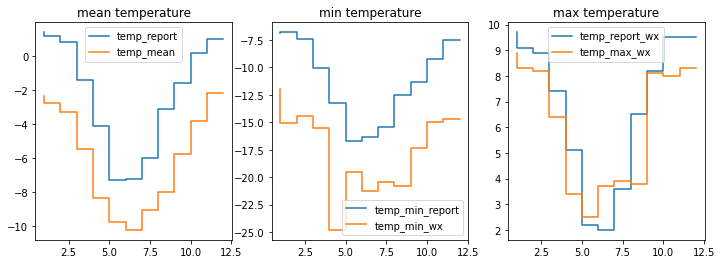

In [75]:

fig, (ax_mean,ax_min,ax_max) = plt.subplots(1,3)
fig.set_size_inches(12,4)
ax_mean.set_title("mean temperature")
ax_mean.step(table_report.datetime,table_report.mean_temp,label="temp_report")
ax_mean.step(table_wx.datetime,table_wx["temp_temperature_C","temp_mean"],label="temp_mean")


ax_min.set_title("min temperature")
ax_min.step(table_report.datetime,table_report.min_temp,label="temp_min_report")
ax_min.step(table_wx.datetime,table_wx["temp_temperature_C","temp_min"],label="temp_min_wx")
#ax_min.step(table_wx.datetime,table_wx["temp_temperature_C","temp_percentile_1"],label="temp_per_1_wx")

ax_max.set_title("max temperature")
ax_max.step(table_report.datetime,table_report.max_temp,label="temp_report_wx")
ax_max.step(table_wx.datetime,table_wx["temp_temperature_C","temp_max"],label="temp_max_wx")
#ax_max.step(table_wx.datetime,table_wx["temp_temperature_C","temp_percentile_99"],label="temp_per_99_wx")
ax_max.legend()
ax_min.legend()
ax_mean.legend()

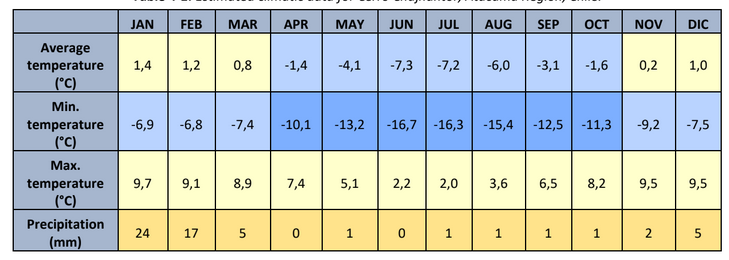

# temperature range between day and night

In [84]:
table_per_day = df.groupby([df.datetime.dt.date]).agg({'temperature_C' : ["mean","max","min","median","std",percentile(99),percentile(1), diff()]}).add_prefix('temp_')

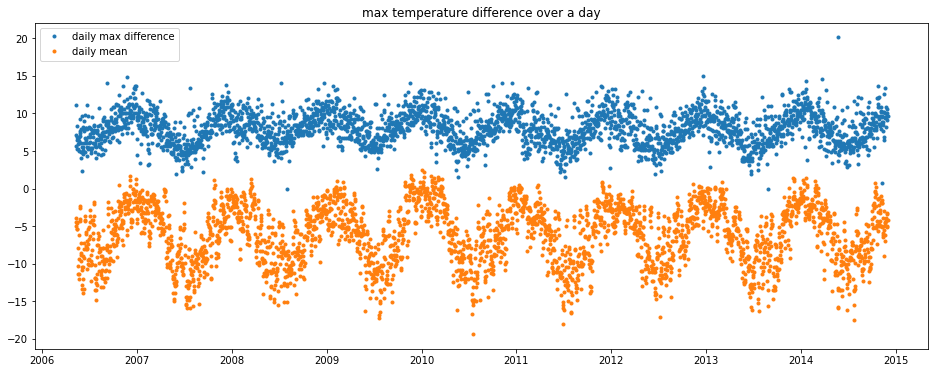

In [108]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,6)
ax.plot_date(table_per_day.index,table_per_day['temp_temperature_C','temp_max_diff'], ms=3.0,label="daily max difference")
ax.plot_date(table_per_day.index,table_per_day['temp_temperature_C','temp_mean'], ms=3.0,label="daily mean")
#ax.plot_date(table_per_day.index,table_per_day['temp_temperature_C','temp_min'], ms=3.0,label="daily min")
#ax.plot_date(table_per_day.index,table_per_day['temp_temperature_C','temp_max'], ms=3.0,label="daily max")
ax.set_title("max temperature difference over a day")
ax.legend()
#np.percentile(table_per_day['temp_temperature_C','temp_max_diff'],99.99)